# Feature Engineering

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes=True)

### Import Necessary Machine Learning Models

In [ ]:
pip install xgboost

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


### Dataset Overview

In [5]:
price_df = pd.read_csv("C:/Users/user100/Desktop/Freelance/clean_data_after_eda.csv")
price_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [6]:
# Convert Date-Time Format
price_df["date_activ"]= pd.to_datetime(price_df["date_activ"], format="%Y-%m-%d")
price_df["date_end"]= pd.to_datetime(price_df["date_end"], format="%Y-%m-%d")
price_df["date_modif_prod"] = pd.to_datetime(price_df["date_modif_prod"], format='%Y-%m-%d')
price_df["date_renewal"] = pd.to_datetime(price_df["date_renewal"], format='%Y-%m-%d')

In [7]:
price_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


Import datasets

In [8]:
price_df = pd.read_csv("price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

In [9]:
client_df = pd.read_csv('client_data.csv')

In [10]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [11]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [12]:
mean_6m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [13]:
mean_6m["mean_6m_price_p1"] = mean_6m["price_off_peak_var"] + mean_6m["price_off_peak_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["price_mid_peak_var"] + mean_6m["price_mid_peak_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["price_peak_var"] + mean_6m["price_peak_fix"]
mean_6m.shape

(16096, 10)

In [14]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [15]:
mean_3m["mean_3m_price_p1"] = mean_3m["price_off_peak_var"] + mean_3m["price_off_peak_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["price_mid_peak_var"] + mean_3m["price_mid_peak_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["price_peak_var"] + mean_3m["price_peak_fix"]
mean_3m.shape

(16095, 10)

In [16]:
mean_3m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,16.360964,24.532715
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [17]:
# Merge into 1 dataframe
price_features = mean_year.merge(mean_6m, on='id').merge(mean_3m, on='id').merge(client_df[['id', 'churn']], on='id')
price_features.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0.121266,0.102368,0.073728,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,16.365274,24.539003,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.144687,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.202024,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.146184,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,0.123007,0.104108,0.075469,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,16.367015,24.540743,0


### Data Preprocessing

In [18]:
df = pd.merge(client_df.drop('churn', axis=1), price_features, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0


In [19]:
df.shape

(14605, 50)

## Feature Engineering

In [20]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,id,object,0,0.0,14605,"[24011ae4ebbe3035111d65fa7c15bc57, d29c2c54acc..."
1,channel_sales,object,0,0.0,8,"[foosdfpfkusacimwkcsosbicdxkicaua, MISSING, lm..."
2,cons_12m,int64,0,0.0,11064,"[0, 4660, 544, 1584]"
3,cons_gas_12m,int64,0,0.0,2111,"[54946, 0, 1542867, 80583]"
4,cons_last_month,int64,0,0.0,4751,"[0, 526, 1998, 1260]"
5,date_activ,datetime64[ns],0,0.0,1796,"[2013-06-15T00:00:00.000000000, 2009-08-21T00:..."
6,date_end,datetime64[ns],0,0.0,368,"[2016-06-15T00:00:00.000000000, 2016-08-30T00:..."
7,date_modif_prod,datetime64[ns],0,0.0,2129,"[2015-11-01T00:00:00.000000000, 2009-08-21T00:..."
8,date_renewal,datetime64[ns],0,0.0,386,"[2015-06-23T00:00:00.000000000, 2015-08-31T00:..."
9,forecast_cons_12m,float64,0,0.0,13992,"[0.0, 189.95, 47.96, 240.04]"


In [21]:
price_df['price_date'].value_counts().sort_index()

2015-01-01    16070
2015-02-01    16082
2015-03-01    16074
2015-04-01    16079
2015-05-01    16080
2015-06-01    16085
2015-07-01    16090
2015-08-01    16094
2015-09-01    16082
2015-10-01    16085
2015-11-01    16087
2015-12-01    16094
Name: price_date, dtype: int64

In [22]:
price_df.head(200)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.0,44.266931,0.0,0.0
...,...,...,...,...,...,...,...,...
195,724535a881cb47ffb40c264738946a86,2015-04-01,0.168363,0.085100,0.0,44.444710,0.0,0.0
196,724535a881cb47ffb40c264738946a86,2015-05-01,0.168363,0.085100,0.0,44.444710,0.0,0.0
197,724535a881cb47ffb40c264738946a86,2015-06-01,0.168363,0.085100,0.0,44.444710,0.0,0.0
198,724535a881cb47ffb40c264738946a86,2015-07-01,0.168363,0.085100,0.0,44.444710,0.0,0.0


### `Price Difference in Jan - Dec`

In [23]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [24]:
diff.shape

(16096, 3)

In [25]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,8.182687,12.311304,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.000000,0.088409,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,16.365274,24.539003,0,-0.006192,0.162916


In [26]:
df.shape

(14605, 52)

### `Price Difference Between Peak Periods`

In [27]:
avg_prices = price_df.groupby('id').agg(price_off_peak_energy=('price_off_peak_var','mean'),
                                        price_mid_peak_energy=('price_mid_peak_var','mean'),
                                        price_peak_energy=('price_peak_var','mean'),
                                        price_off_peak_power=('price_off_peak_fix','mean'),
                                        price_mid_peak_power=('price_mid_peak_fix','mean'),
                                        price_peak_power=('price_peak_fix','mean')).reset_index()

In [28]:
avg_prices

,id,price_off_peak_energy,price_mid_peak_energy,price_peak_energy,price_off_peak_power,price_mid_peak_power,price_peak_power
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.073160,0.103794,40.701732,16.280694,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.069032,0.098292,40.647427,16.258971,24.388455
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.080780,0.115125,40.896427,16.507972,24.637456
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.094842,0.129497,41.160171,16.763569,24.895768
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.073735,0.103499,40.606699,16.242678,24.364017


In [29]:
# Calculate the mean difference between consecutive periods
avg_prices['offpeak_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_peak_energy']
avg_prices['peak_mid_avg_price_energy_diff'] = avg_prices['price_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['off_mid_peak_avg_price_energy_diff'] = avg_prices['price_off_peak_energy'] - avg_prices['price_mid_peak_energy']
avg_prices['offpeak_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_peak_power']
avg_prices['peak_mid_avg_price_power_diff'] = avg_prices['price_peak_power'] - avg_prices['price_mid_peak_power']
avg_prices['off_mid_peak_avg_price_power_diff'] = avg_prices['price_off_peak_power'] - avg_prices['price_mid_peak_power']

avg_prices.head()

,id,price_off_peak_energy,price_mid_peak_energy,price_peak_energy,price_off_peak_power,price_mid_peak_power,price_peak_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.073160,0.103794,40.701732,16.280694,24.421038,0.020545,0.030633,0.051178,16.280694,8.140345,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0.146426,0.000000,0.146426,44.385450,0.000000,44.385450
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0.181558,0.000000,0.181558,45.319710,0.000000,45.319710
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.069032,0.098292,40.647427,16.258971,24.388455,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930


In [30]:
avg_prices.shape

(16096, 13)

In [31]:
# get only difference features and id
col = avg_prices.iloc[:,[0,-6,-5,-4,-3,-2,-1]].columns

# merge
df = pd.merge(df, avg_prices[col], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_peak_avg_price_energy_diff,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,12.311304,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088409,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,24.539003,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [32]:
df.shape

(14605, 58)

In [33]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [34]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


### Feature Encoding

In [35]:
from datetime import datetime

# create function
def convert_months(reference_date, df, column):
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

# drop original features
drop_list = ['date_activ','date_end','date_modif_prod','date_renewal']
df = df.drop(drop_list, axis=1)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_avg_price_energy_diff,off_mid_peak_avg_price_energy_diff,offpeak_peak_avg_price_power_diff,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


In [36]:
cat = df.select_dtypes(include='object').columns
cat

Index(['id', 'channel_sales', 'has_gas', 'origin_up'], dtype='object')

In [37]:
# has_gas
df['has_gas'] = np.where(df['has_gas']=='f',0,1)
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


In [38]:
# Value counts on Sales Channels 
df['channel_sales'] = df['channel_sales'].astype('category')

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [39]:
## one-hot encoding on 'origin up' and removing dummy columns
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_avg_price_power_diff,off_mid_peak_avg_price_power_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,7.450670,26.040925,3,30,5,2,6,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,44.311375,7,76,7,76,4,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000000,44.385450,6,68,3,68,8,1,0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,44.400265,6,69,2,69,9,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,8.137629,24.412893,6,71,2,71,9,1,0,0


In [40]:
# one-hot encoding on 'channel_sales' and removing dummy columns
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,1,0,0,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,1,0,0,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,1,0,0,0,0


In [41]:
# List numeric values to view skewness of data

skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [42]:
# Apply Log10(x+1) to reduce skewness

df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [43]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


C:\Users\user100\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user100\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user100\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

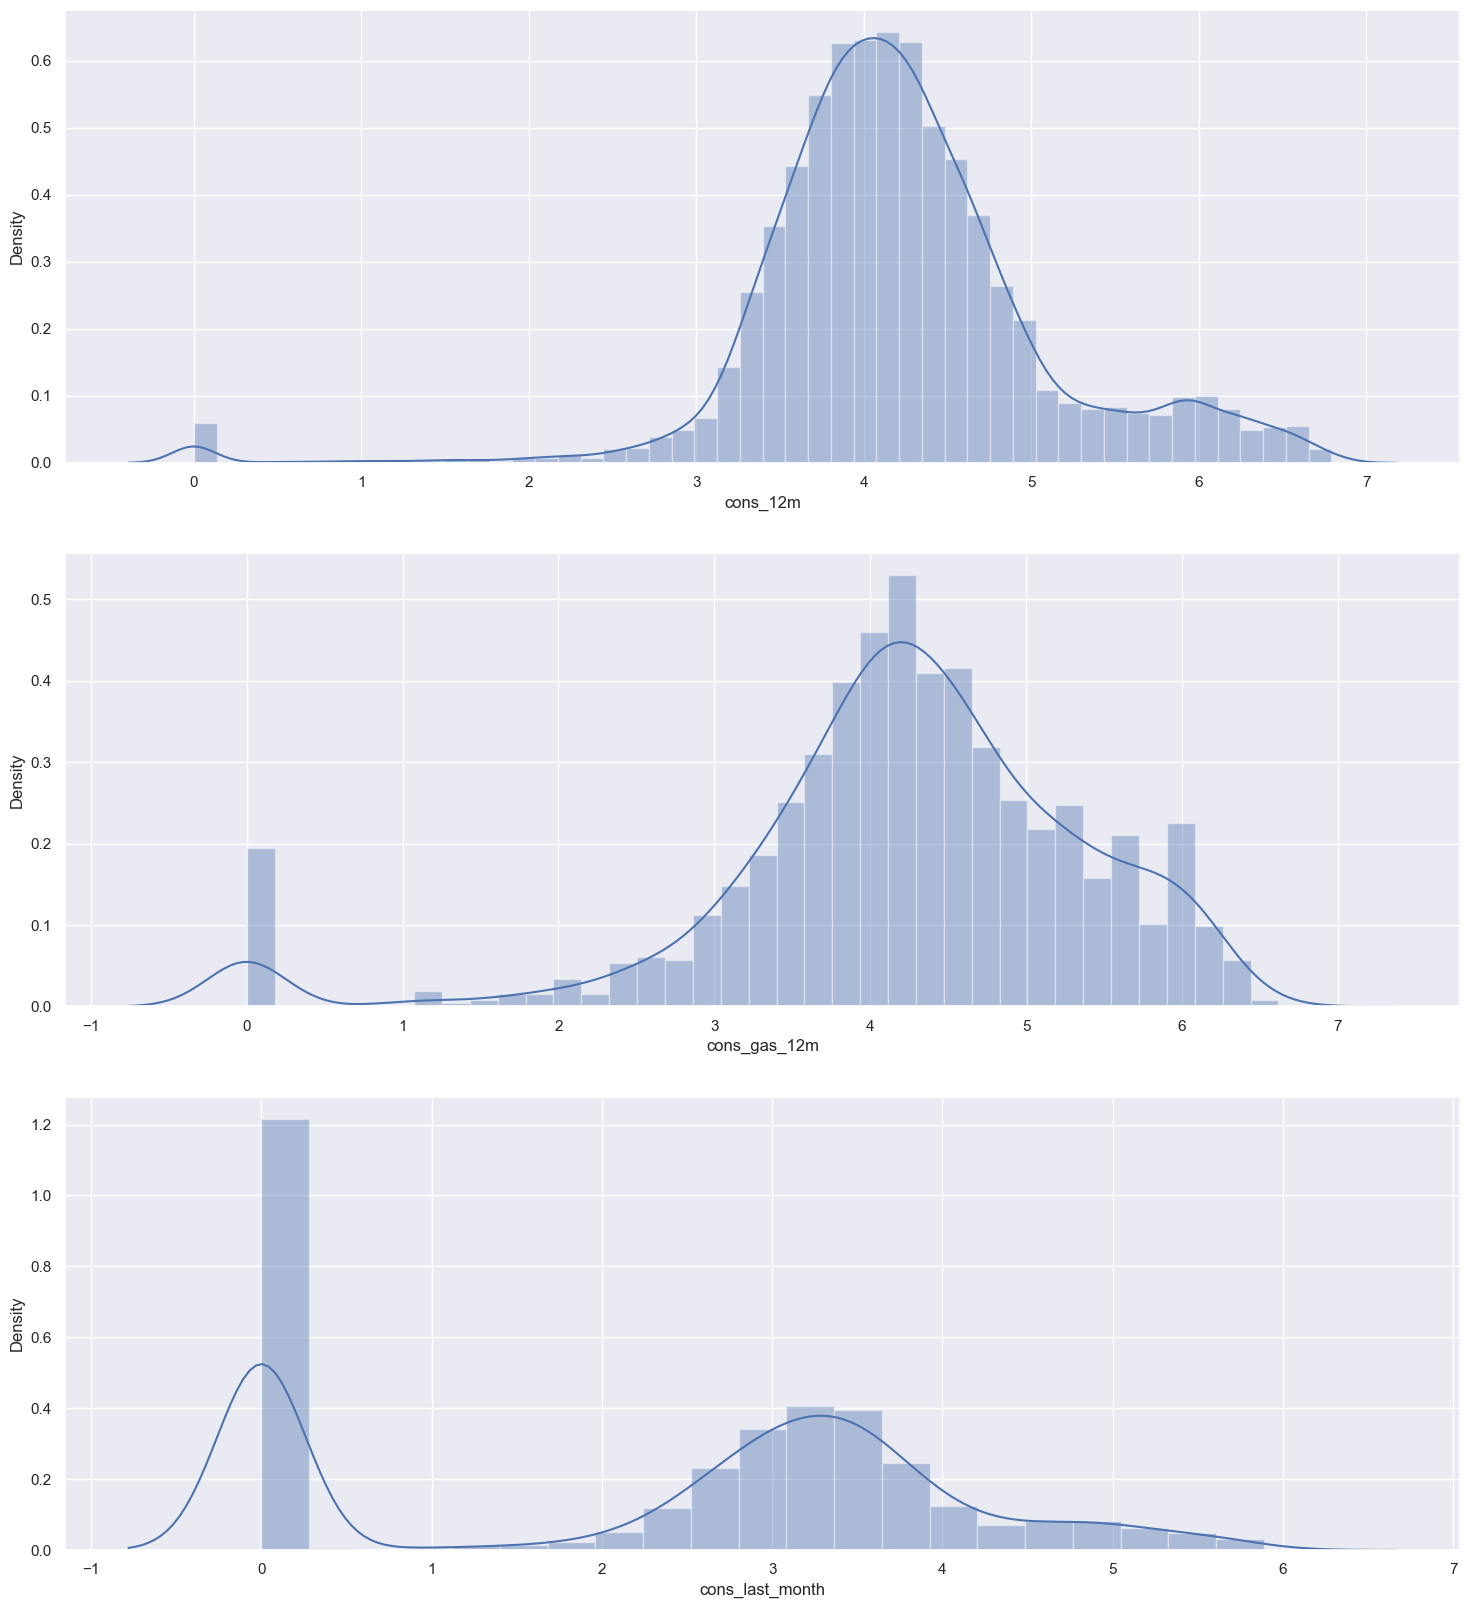

In [44]:
# Visualise Distribution 

fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

In [ ]:
# visualise Correlation

correlation = df.corr()
     
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churn','id'], axis=1),
                                                    df['churn'],
                                                    test_size=0.3,
                                                    random_state=123)

X_train.shape, X_test.shape

((10223, 63), (4382, 63))

In [47]:
df['churn'].value_counts(normalize=True)*100

0    90.284149
1     9.715851
Name: churn, dtype: float64

### Handling Imbalance Target

In [48]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

### Modelling

In [49]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, make_scorer

### Basic Modelling

In [50]:
lr_sm = LogisticRegression()
dt_sm = DecisionTreeClassifier()
rf_sm = RandomForestClassifier()
ab_sm = AdaBoostClassifier()
gb_sm = GradientBoostingClassifier()
xg_sm = XGBClassifier()


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

C:\Users\user100\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Calculates and displays a comparison of accuracy, precision, recall, F1-score, and F2-score

In [51]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm), fbeta_score(y_test, y_pred_lr_sm, pos_label=0,  beta=2)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm), fbeta_score(y_test, y_pred_dt_sm, pos_label=0, beta=2)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm), fbeta_score(y_test, y_pred_rf_sm, pos_label=0, beta=2)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm), fbeta_score(y_test, y_pred_ab_sm, pos_label=0, beta=2)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm), fbeta_score(y_test, y_pred_gb_sm, pos_label=0, beta=2)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)
df_score

C:\Users\user100\AppData\Local\Temp\ipykernel_10628\1622583722.py:14: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'],dtype=float)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.714514,0.156223,0.404444,0.225387,0.778306
1,Decision Tree,0.807394,0.179153,0.244444,0.206767,0.879155
2,Random Forest,0.896623,0.486486,0.120000,0.192513,0.968798
3,Ada Boost,0.714514,0.156223,0.404444,0.225387,0.778306
4,Gradient Boost,0.874715,0.256158,0.115556,0.159265,0.949666
5,XG Boost,0.900502,0.547297,0.180000,0.270903,0.949666


### hyperparameter tuning for a RandomForestClassifier

max_depth: 1; train: 0.6911568690536379; test: 0.6876318208858364
max_depth: 2; train: 0.7216941348104584; test: 0.7193800943800943
max_depth: 3; train: 0.7452642073778664; test: 0.7405630198336534
max_depth: 4; train: 0.783546092926211; test: 0.7774728174812625
max_depth: 5; train: 0.802442945826448; test: 0.7951680672268908
max_depth: 6; train: 0.8323171407666895; test: 0.8226067017562144
max_depth: 7; train: 0.869154567619215; test: 0.8591331269349846
max_depth: 8; train: 0.8846970725405618; test: 0.8745823695708046
max_depth: 9; train: 0.9153949828268335; test: 0.9027459371338326
max_depth: 10; train: 0.9427885966239438; test: 0.9251569779218147
max_depth: 11; train: 0.9548438647259535; test: 0.9315137730603994
max_depth: 12; train: 0.9695813391971715; test: 0.9418136020151134
max_depth: 13; train: 0.9788776456881485; test: 0.9499396863691193
max_depth: 14; train: 0.9892679352628062; test: 0.9573721163490472
max_depth: 15; train: 0.9928626875970328; test: 0.9594086695063893
max_dep

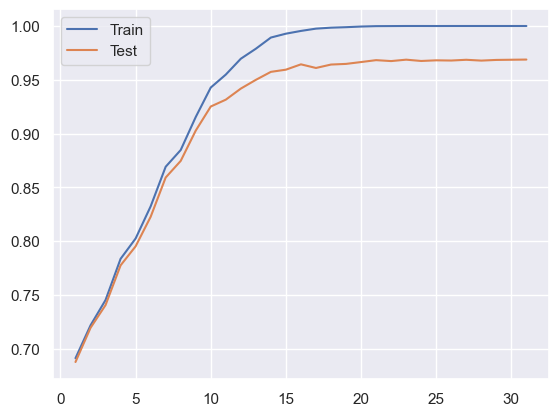

In [52]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=x, 
                                             random_state=123)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_split: 2; train: 0.9928626875970328; test: 0.9594086695063893
min_samples_split: 4; train: 0.9904603988113182; test: 0.9584920794064568
min_samples_split: 7; train: 0.9871332216350905; test: 0.9595149814610683
min_samples_split: 10; train: 0.9851344974044361; test: 0.9588011226944669
min_samples_split: 13; train: 0.9831249865986235; test: 0.9592440344896731
min_samples_split: 16; train: 0.9819860343571949; test: 0.9557717380403169
min_samples_split: 19; train: 0.9809381023773828; test: 0.9572868100466234
min_samples_split: 22; train: 0.9810194299409399; test: 0.9566198595787362
min_samples_split: 25; train: 0.979170680538608; test: 0.9581348708949613
min_samples_split: 27; train: 0.9784934731435907; test: 0.9578467244749637
min_samples_split: 30; train: 0.9764446631437068; test: 0.9559634868091083
min_samples_split: 33; train: 0.9759907557990243; test: 0.9557606460350102
min_samples_split: 36; train: 0.9757662609885998; test: 0.9564650416290502
min_samples_split: 39; train:

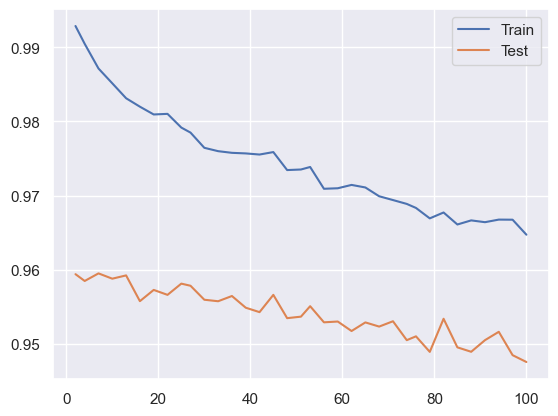

In [53]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                             random_state=123,
                                             min_samples_split=x)
    model_rf_tunned.fit(X_smote,y_smote)
    
    # eval on train
    y_pred_train_rf = model_rf_tunned.predict(X_train)
    train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
    train_score.append(train_rf)
    
    # eval on test
    y_pred_test_rf = model_rf_tunned.predict(X_test)
    test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)
    test_score.append(test_rf)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_rf) + '; test: ' + str(test_rf))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

### Evaluating RandomForestClassifier

In [54]:
model_rf_tunned = RandomForestClassifier(max_depth=15, 
                                         random_state=123,
                                         min_samples_split=7)
model_rf_tunned.fit(X_smote,y_smote)
    
# eval on train
y_pred_train_rf = model_rf_tunned.predict(X_train)
train_rf = fbeta_score(y_train, y_pred_train_rf, pos_label=0, beta=2)
   
# eval on test
y_pred_test_rf = model_rf_tunned.predict(X_test)
test_rf = fbeta_score(y_test, y_pred_test_rf, pos_label=0, beta=2)

print('F2 Train RF Score :', train_rf)
print('F2 Test RF Score :', test_rf)

F2 Train RF Score : 0.9871332216350905
F2 Test RF Score : 0.9595149814610683


In [55]:
y_train_pred_rf = model_rf_tunned.predict(X_train)
y_test_pred_rf = model_rf_tunned.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_train, y_train_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('F2 Score:', np.round(fbeta_score(y_test, y_test_pred_rf, pos_label=0, beta=2),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

TRAINING RESULT:
F2 Score: 0.987
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9254
           1       0.91      0.64      0.75       969

    accuracy                           0.96     10223
   macro avg       0.94      0.82      0.87     10223
weighted avg       0.96      0.96      0.96     10223

Confussion Matrix ------------------------------------
[[9191   63]
 [ 347  622]]


TESTING RESULT:
F2 Score: 0.96
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3932
           1       0.33      0.11      0.17       450

    accuracy                           0.89      4382
   macro avg       0.62      0.54      0.55      4382
weighted avg       0.85      0.89      0.86      4382

Confussion Matrix ------------------------------------
[[3830  102]
 [ 400   50]]


### Visualizing Confusion Matrix 

<AxesSubplot:>

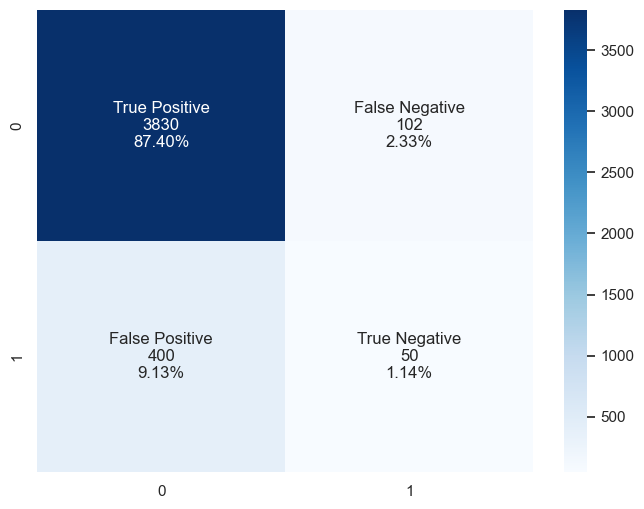

In [56]:
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Feature Importance

Shape of shap_values_class1: (4382, 63)
Shape of X_test: (4382, 63)


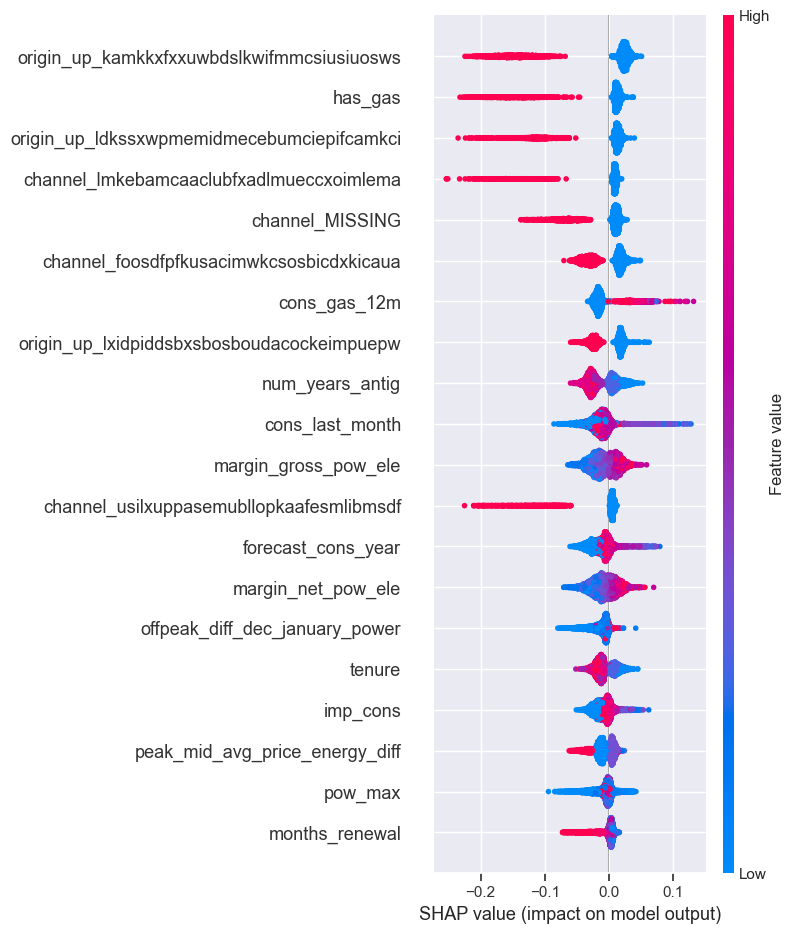

In [58]:
explainer = shap.TreeExplainer(model_rf_tunned)
shap_values = explainer.shap_values(X_test)

# For binary classification, extract SHAP values for the positive class (class 1)
# Use [:, :, 1] to get all samples, all features, for class 1
shap_values_class1 = shap_values[:, :, 1]

print("Shape of shap_values_class1:", shap_values_class1.shape)  # Should be (4382, 63)
print("Shape of X_test:", X_test.shape)  # Should be (4382, 63)

# Now create the summary plot
shap.summary_plot(shap_values_class1, X_test)

In [59]:
client_churn_proba = model_rf_tunned.predict_proba(X_test)[:,1]
client_churn_proba

array([0.18551833, 0.16584623, 0.35567893, ..., 0.29021709, 0.03698078,
       0.07656351])

In [60]:
proba_predictions = model_rf_tunned.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [61]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [62]:
X_test['churn'] = y_pred_test_rf.tolist()
X_test['churn_probability'] = probabilities.tolist()
#X_test.to_csv('X_test_with_churn_proba.csv')

In [63]:
test_df = X_test.copy()

In [64]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [65]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

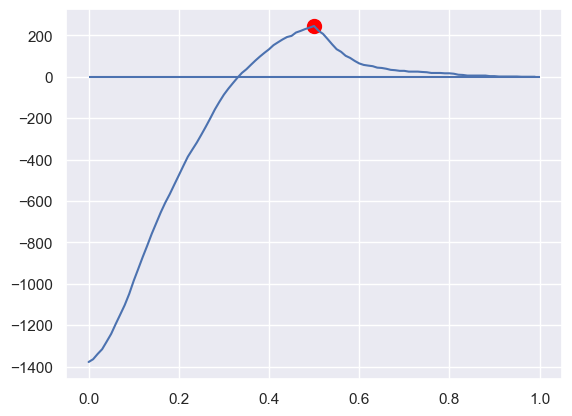

Maximum benefit at cutoff 0.5 with revenue delta of $245.27


In [66]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

In [67]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

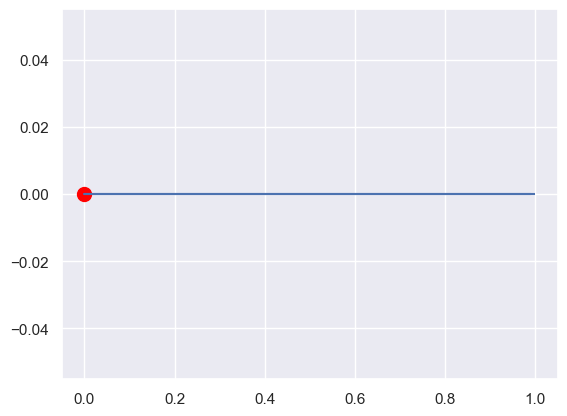

Maximum benefit at cutoff 0.0 with revenue delta of $0.00


In [68]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

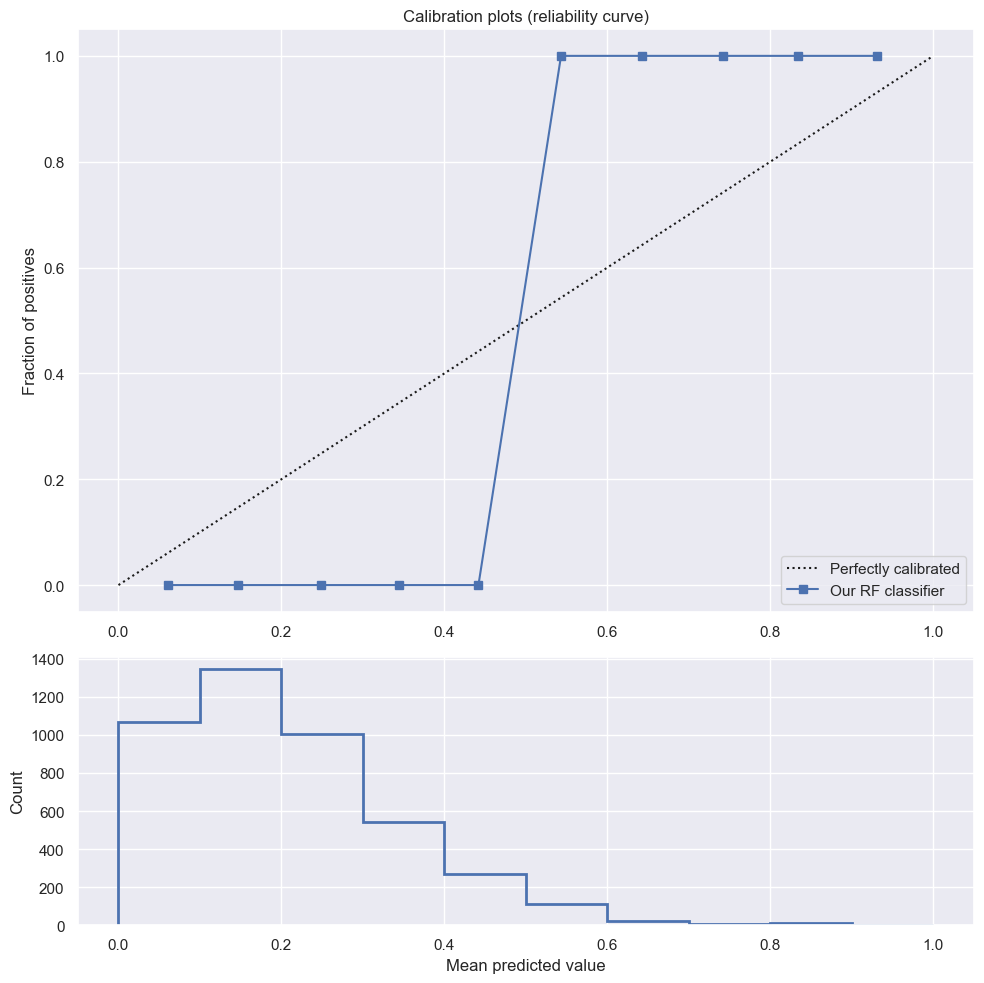

In [69]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

In [70]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

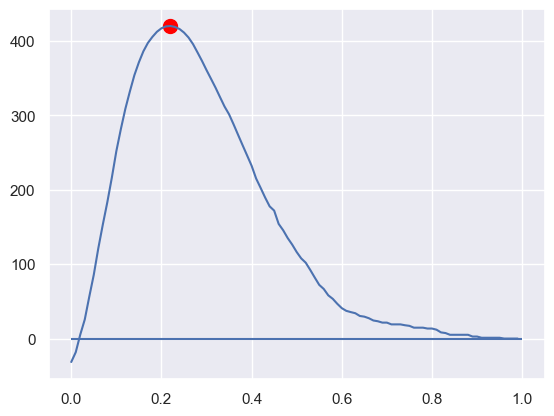

Maximum benefit at cutoff 0.22 with revenue delta of $419.96


In [71]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)